# [목차]


# 1. 문제정의
# 2. Analysis
# 3. Insight
# 4. Suggestion

## 참고문헌







### 데이터
공동 데이터:
KT빅데이터플랫폼 (https://www.bigdata-telecom.kr)

●dlvr_call.csv (1.25GB)

배달 호출 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 경기대학교 데이터)
음식점에서 배달을 위해 배달기사를 호출하고 고객에게 배달이 완료되는 과정에서 생산되는 데이터


●popl.csv (972MB)

행정동별 생활인구 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 KT 데이터)
시간대-행정동-성별-연령 구분에 따른 생활인구 데이터


●StarupOrClosing_Shop_ver2.csv(11.4MB)

업종/상호별 창업.폐업 유추 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 (주)네스 데이터)
114에 등록된 정보 기반의 업종/상호별 창업/폐업 유추 분류 데이터


●StartupOrClosing_Region_ver2.csv(5.96MB)

업종/지역별 창업/폐업 유추 데이터 (출처 : KT 총신 빅데이터 플랫폼 내 (주)네스 데이터)
114에 등록된 정보 기반의 업종/지역별 창업/폐업 유추 분류 데이터


외부 데이터:


●통계청 행정구역(시군구)별, 성별 인구수https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3&checkFlag=N

●통계청1인가구비율(시도/시/군/구)( https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL21161&conn_path=I2 )



# 문제정의



2020년 세계가 잠시 멈추었다. 모든 사람들과 처음만난 바이러스와의 전쟁. 이 전쟁은 세상에 많은 변화를 주기 시작했다. COVID-19는 사람대 사람과의 만남을 어렵게 하였다. 이러한 상황은 소상공인들에게 바로 타격감을 주기 시작했다. 
반대로 COVID-19는 우리나라의 대표적인 IT 사업과 배달 사업의 우수함을 더욱 들어나게 한다.
‘잠시 멈춤’과 ‘사회적 거리두기’ 시행으로 인해 외부활동은 기피되어졌고 그에 따라 음식 배달 이용건수는 상승하였다. 


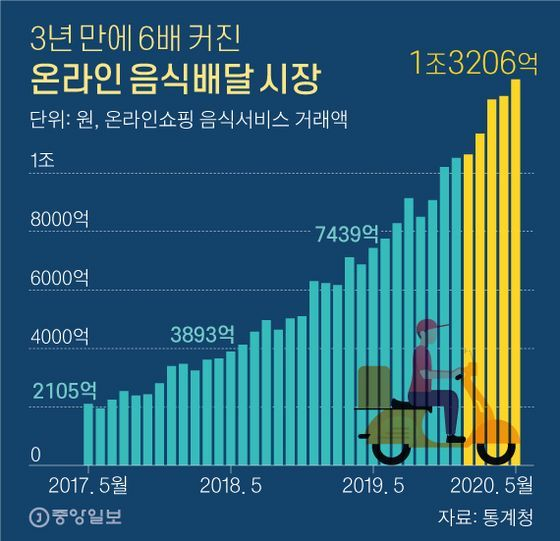

배달이용건수 상승은 지속적인 ‘사회적 거리두기’ 연장으로 피해를 보았던 배달을 안하는 가게도 배달을 하기 시작하였다. 
하지만 지속되는 COVID-19는 매출에 영향을 미쳤으며 그로인한 피해는 가게들을 문을 닫게 하였다. 
이러한 문제점을 파악하여 COVID-19시대의 창폐업의 요인을 파악하여 창*폐업을 예측하고자 한다.


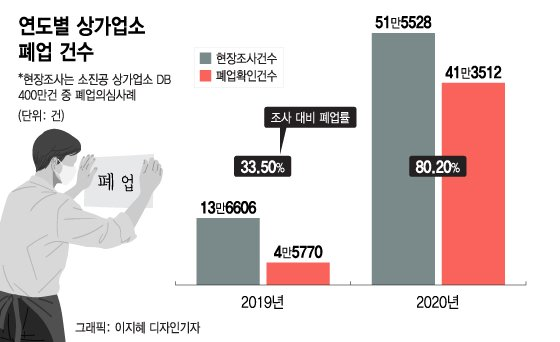


In [ ]:
from google.colab import drive

drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns

In [ ]:
# 한글 표시 필요 파일 설치 / 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 모든 파일 변수 저장

In [ ]:
kt = '/gdrive/Shareddrives/DACON/DACON/KT_빅데이터플랫폼_데이터셋/'
covid = '/gdrive/Shareddrives/DACON/DACON/covid_19_dataset/'

In [ ]:
file_kt = os.listdir('/gdrive/Shareddrives/DACON/DACON/KT_빅데이터플랫폼_데이터셋/')
file_cov = os.listdir('/gdrive/Shareddrives/DACON/DACON/covid_19_dataset/')

In [ ]:
file_kt_list = [file for file in file_kt if file.endswith('.csv')]
file_covid_list = [file for file in file_cov if file.endswith('.csv')]

In [ ]:
kt_var = [i[:-4] for i in file_kt_list]
covid_var = [i[:-4] for i in file_covid_list]

In [ ]:
kt_dataset = {}
for i, j in zip(file_kt_list, kt_var):
    try :
        kt_dataset[j] = pd.read_csv(kt+i)
    except:
        kt_dataset[j] = pd.read_csv(kt+i, encoding='cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
covid_dataset = {}
for i, j in zip(file_covid_list, covid_var):
    try :
        covid_dataset[j] = pd.read_csv(covid+i)
    except:
        covid_dataset[j] = pd.read_csv(covid+i, encoding='cp949')

# Analysis

### [어느 지역의 배달 이용 건수가 가장 많을까?]
#### 1. 코로나와 배달 이용 감염수


In [ ]:
kt_dataset['dlvr_call'] 

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56,2020-03-31 23:56,2020-04-01 0:14,2020-04-01 0:18,\N
4296267,7750548,2020-03-31,C000104,1,C000102,S0021967,치킨,1156013300,서울특별시,영등포구,대림동,\N,1156070000,1.15603E+11,1162010200,서울특별시,관악구,신림동,\N,1162065500,1.16204E+11,D0002307,6300,200,26000,1,승인:신한카드,2020-03-31 23:55,2020-03-31 23:55,2020-04-01 0:17,2020-04-01 0:26,\N
4296268,7750550,2020-03-31,C000224,1,C000224,S0035329,분식,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127310100,경기도,안산시 단원구,고잔동,\N,4127353500,4.12734E+11,D0009816,5500,200,17000,1,승인:롯데카드사,2020-03-31 23:58,2020-03-31 23:59,2020-04-01 0:18,2020-04-01 0:30,\N
4296269,7750552,2020-03-31,C000130,1,C000130,S0002286,족발/보쌈,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,4.12813E+11,4128112800,경기도,고양시 덕양구,행신동,\N,4128165500,4.12814E+11,D0002233,4000,300,35000,2,NaN,2020-03-31 23:56,2020-04-01 0:01,2020-04-01 0:16,2020-04-01 0:23,\N


In [ ]:
covid_dataset['PatientInfo']

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [ ]:
# 월 추출
kt_dataset['dlvr_call']['months'] = kt_dataset['dlvr_call']['PROCESS_DT'].apply(lambda x : x[-5:-3])
dlv_month_cnt = kt_dataset['dlvr_call']['months'].value_counts().reindex(['12','01','02','03','04','05'])

In [ ]:
# 전국 월별 배달량
dlv_months = dlv_month_cnt.reset_index().rename(columns = {'index' : 'months', 'months' : 'delivery'})

In [ ]:
covid_dataset['PatientInfo']['months'] = covid_dataset['PatientInfo']['confirmed_date'].apply(lambda x : str(x)[-5: -3])
cov_month_cnt = covid_dataset['PatientInfo']['months'].value_counts().reindex(['12', '01','02','03','04','05','06'])

In [ ]:
# ' ', '01','02','03','04','05','06' 으로 나뉨, ' '의 경우 확진 날짜가 불분명함
covid_dataset['PatientInfo']['months'].sort_values()

4730      
4732      
4731      
1644    01
2214    01
        ..
1293    06
1294    06
1295    06
1282    06
5164    06
Name: months, Length: 5165, dtype: object

In [ ]:
# 전국 월별 확진자
# 1월 20일 첫 확진자로 12월은 0명
cov_month = cov_month_cnt.fillna(0).reset_index().rename(columns = {'index' : 'months', 'months' : 'cov_confirmed'})

In [ ]:
# 6월 배달 데이터 부재로 6월 제외
dlv_cov = pd.merge(dlv_months, cov_month, on='months', how='outer').fillna(0)[:6]
dlv_cov

,months,delivery,cov_confirmed
0,12,641606.0,0.0
1,01,631977.0,11.0
2,02,696024.0,906.0
3,03,778472.0,1958.0
4,04,749856.0,532.0
5,05,798336.0,640.0


위의 도표를 보면 코로나 확진자 수가 많을 수록 배달건수가 늘은것을 확인할 수 있다.
특히 2월 부터 3월은 코로나 대구 신천지 사건을 시작으로 우리나라에 처음으로 코로나 대유행이 시작되었을 때이다. 가장 사람들이 코로나의 위험성을 느껴 배달이용이 늘었을 것으로 볼 수 있다.





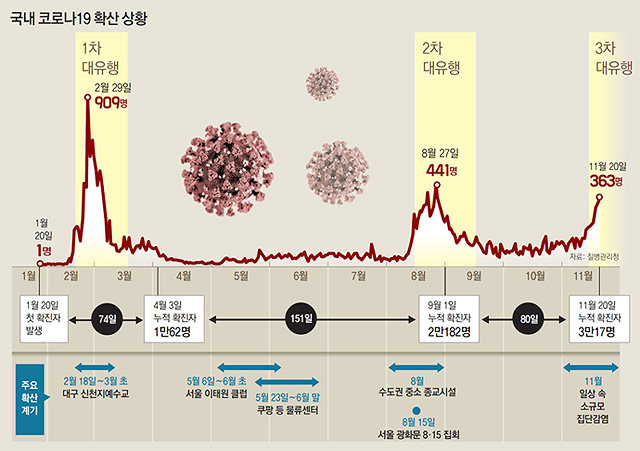


#### 2. 코로나 배달 업종 중 가장 배달이용건수가 많은 곳 시각화

코라나 이후로 배달이 가능한 업종이 늘었으며, 사람들이 배달을 이용하는 이유 또한 변했을거라고 생각한다. 과거에 시장조사전문기업 엠브레인 '트렌드모니'에서 진행한 설문조사에 따르면 아래와 같이 '다른음식이 먹고 싶을 때' 이다. 하지만 COVID-19로 인해 외식이 힘들어지고 밖에서 장을 보는것또한 고민하게 되는 상황이 되어 배달 서비스를 사용하는 이유또한 변했을것이며 그에 따라 시키는 음식의 종류도 변했을것이라 생각되어 어떻게 변화했는지 시각화 해보고자 한다.


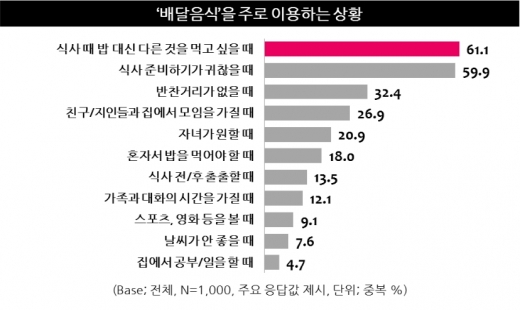

In [ ]:
# 배달업종 vs 배달량
dlvr_type_amount = kt_dataset['dlvr_call'].groupby(by = 'DLVR_STORE_INDUTY_NM').count()['PROCESS_DT'].sort_values()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


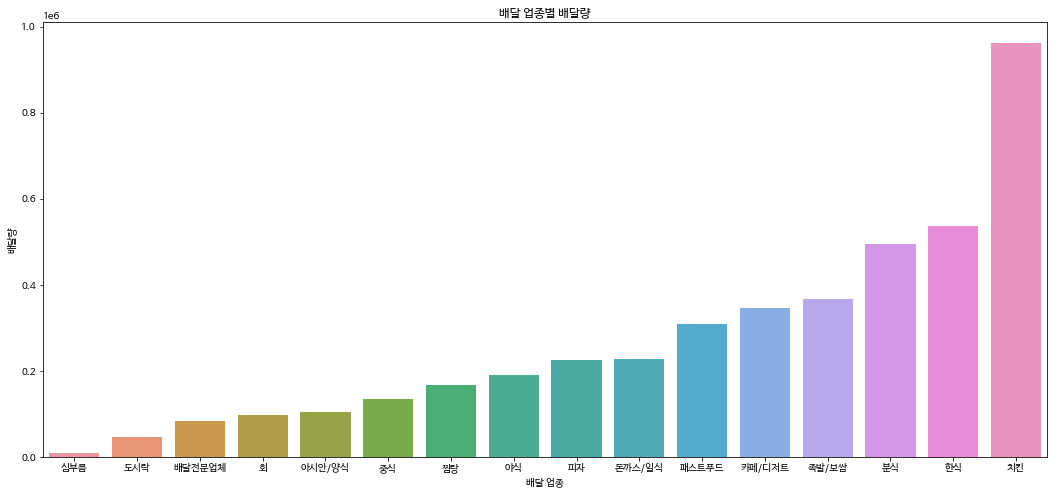

In [ ]:

plt.rcParams["figure.figsize"] = (18,8)
#plt.bar(dlvr_type_amount.index, dlvr_type_amount)
ax = sns.barplot(dlvr_type_amount.index, dlvr_type_amount)
ax.set(xlabel='배달 업종', ylabel='배달량')
plt.title('배달 업종별 배달량')
plt.show()

#### 3. 코로나 이후 배달 업종 이용의 변화 (코로나 감염수와 비교)



In [ ]:
# 비교가 힘들기 때문에 scaling으로 비교
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(cov_month_cnt.fillna(0)[:'05'].values.reshape(-1, 1))
scaled_cov = scaler.transform(dlv_cov['cov_confirmed'][:6].values.reshape(-1, 1))
scaled_cov

array([[0.        ],
       [0.00561798],
       [0.46271706],
       [1.        ],
       [0.27170582],
       [0.32686415]])

In [ ]:
scaler.fit(dlv_month_cnt.fillna(0)[:6].values.reshape(-1, 1))
scaled_dlv = scaler.transform(dlv_cov['delivery'][:6].values.reshape(-1, 1))
scaled_dlv

array([[0.05788085],
       [0.        ],
       [0.3849927 ],
       [0.88059558],
       [0.70858204],
       [1.        ]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


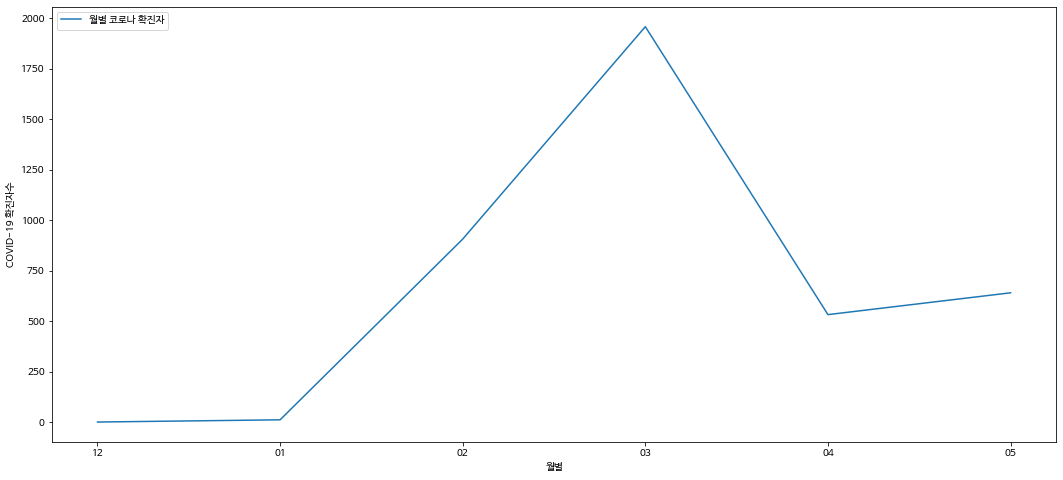

In [ ]:
#겹치는 기간만 활용
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.lineplot(dlv_cov['months'][:6], dlv_cov['cov_confirmed'][:6], label = '월별 코로나 확진자')
ax.set(xlabel='월별', ylabel='COVID-19 확진자수')
plt.legend(loc = 'upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


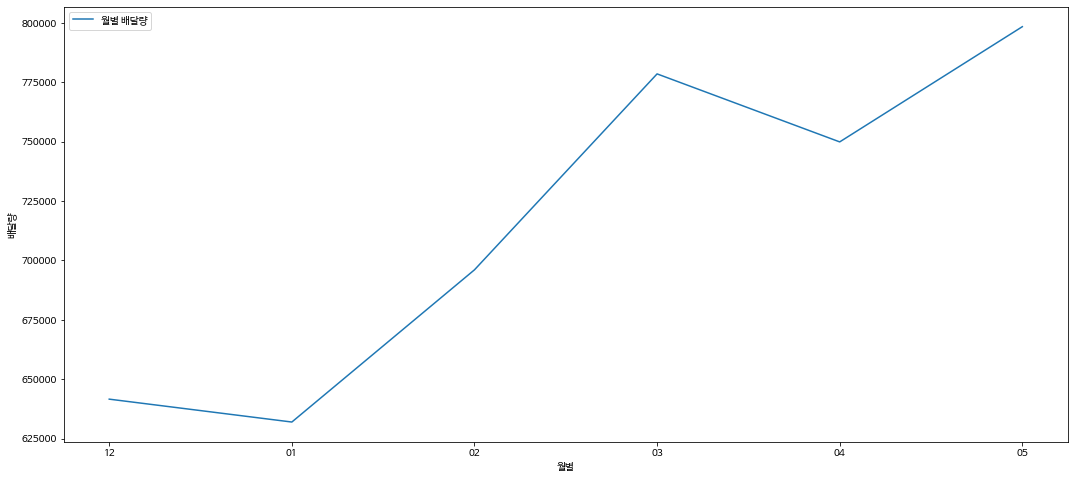

In [ ]:
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.lineplot(dlv_cov['months'][:6], dlv_cov['delivery'][:6], label = '월별 배달량')
ax.set(xlabel='월별', ylabel='배달량')
plt.legend(loc = 'upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '코로나, 배달량 비교 (scaled ver.)')

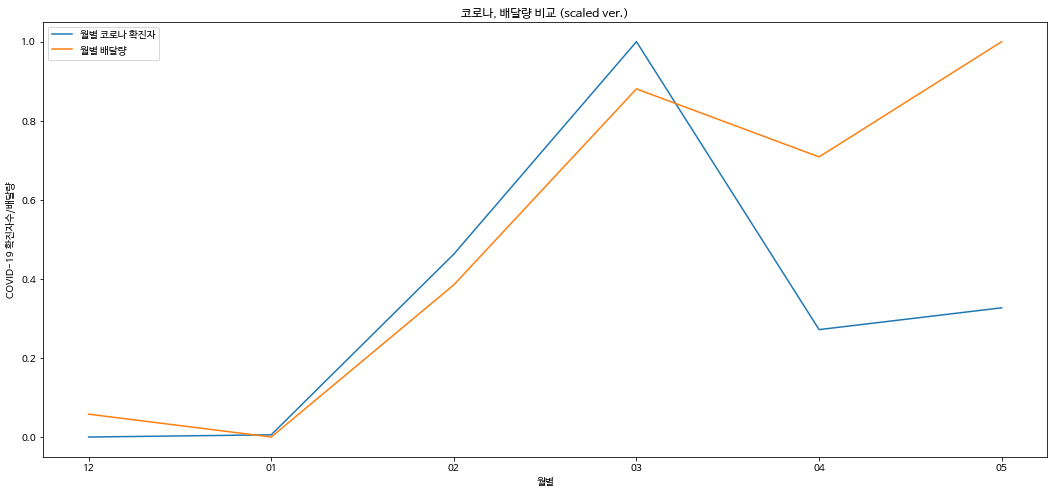

In [ ]:
#겹치는 기간만 활용
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.lineplot(cov_month_cnt.fillna(0)[:'05'].index, scaled_cov.reshape(-1), label = '월별 코로나 확진자')
ax1 = sns.lineplot(dlv_month_cnt.index, scaled_dlv.reshape(-1), label = '월별 배달량')
ax.set(xlabel='월별', ylabel='COVID-19 확진자수/배달량')
plt.title('코로나, 배달량 비교 (scaled ver.)')

위의 그래프를보면 월별 확진자 수와 월별 배달이용의 그래프를 나타냈다. 
배달 이용건수와 코로나확진자수의 단위가 차이가 많이 나 MinMaxScaler()을 활용하여 전처리 후 그래프를 구현하였다.
확실히 확진자수에 따라 월별 배달이용 또한 변화하는것을 확인할 수있다.

#### 월별 음식점 폐업 상황

In [ ]:
region_food_keywords = ['감자탕','게요리','곰탕','곱창.양구이','국수','굴요리','김밥','낙지요리','닭갈비','닭강정','닭발','닭요리','닭집','도너츠','돈가스','돼지갈비','돼지국밥','두부요리','떡볶이','라면','막국수','만두','매운탕','메밀요리','밀면','백숙','베트남음식','보리밥','복어요리','부대찌개','분식','불닭','브런치카페','빵.과자','삼겹살','삼계탕','샤브샤브','설렁탕','소머리국밥','순대.순대국','순대국밥','순두부','스테이크','스파게티','쌈밥','아귀요리','아이스크림','야식','양고기','양식','오리고기','오리요리','오징어요리','우동','육류.고기요리','육류','음식배달대행','음식점-고로케전문','음식점-닭요리전문','음식점-마라탕','음식점-생태/동태/명태요리전문','음식점-이자카야','이탈리아요리','일식','일식튀김.꼬치','장어','전복요리','제과.제빵','제과점','조개구이','족발.보쌈','중국음식','쭈꾸미요리','찌개.전골','찜닭','참치요리','철판구이','초밥.롤','추어탕','출장요리','치킨','카페','카페-디저트','칼국수','코다리전문','콩요리','태국음식','토스트','편의점','포장마차','퓨전음식','프랜차이즈','한식','한우고기','한정식','핫도그','해장국','햄버거','호두과자','홍어','횟집','흑돼지']
food_keywords= ['게요리','국수','돈가스','돼지국밥','떡.한과','스파게티','피자','카페','김밥','떡볶이','카페-디저트','한식','제과점','편의점','치킨','아이스크림','야식','육류.고기요리','냉면','일식튀김.꼬치','족발.보쌈','삼계탕','관광음식점','중국음식','감자탕','분식','샤브샤브','스테이크','출장요리','장어','양식','닭발','호프','도시락','일식','돼지갈비','샌드위치','삼겹살','순대국밥','육류','곱창.양구이','비빔밥','한우고기','한정식','닭집','도너츠','막국수','만두','말고기','밀면','불닭','사철.영양탕','순대.순대국','아귀요리','오리고기','음식배달대행','음식점-생태/동태/명태요리전문','음식점-이자카야','쭈꾸미요리','패스트푸드(종합)','포장마차','핫도그','횟집','흑돼지','낙지요리','닭요리','대구탕','두부요리','떡집','라면','막창','버섯요리','부대찌개','빵.과자','설렁탕','시락국밥','양고기','찜닭','토스트','한식배달','해물.생선요리','꽈배기전문','복어요리','소머리국밥','전복요리','햄버거','갈비탕','곰탕','굴요리','꿩고기','다슬기요리','닭갈비','닭강정','떡갈비','머릿고기','멕시코요리','보리밥','붕어찜','브런치카페','샐러드전문점','순두부','쌈밥','어죽','어탕','오리요리','오징어요리','우동','육개장전문','음식점-고로케전문','음식점-닭요리전문','음식점-마라탕','인도음식','제과.제빵','주먹밥','찌개.전골','참치요리','초밥.롤','추어탕','카레','코다리전문','콩국수','콩나물국밥','콩요리','태국음식','퓨전음식','호두과자','홍어','감자튀김','멧돼지고기','양식업(기타)','화덕피자전문','보리빵','바닷가재요리','소고기국밥','프랑스요리','호떡','샤브샤브부페','문어요리','연어전문']
region_food_keywords.extend(food_keywords)
food_keys = list(set(region_food_keywords))

In [ ]:
closing = kt_dataset['StartupOrClosing_Region_ver2']
closing = closing[closing['DIVISION']==0]
closing = closing[closing['INDUTY_NM'].isin(food_keys)]
closing['months'] = closing['DATE'].apply(lambda x : str(x)[-4:-2])
closed_food = closing['months'].value_counts()
closed_food = closed_food.reindex(['01','02','03','04','05','06'])
closed_food

01      21
02      21
03      12
04      10
05    7567
06    2458
Name: months, dtype: int64

In [ ]:
opening = kt_dataset['StartupOrClosing_Region_ver2']
opening = opening[opening['DIVISION']==1]
opening = opening[opening['INDUTY_NM'].isin(food_keys)]
opening['months'] = opening['DATE'].apply(lambda x : str(x)[-4:-2])
opening_food = opening['months'].value_counts()
opening_food = opening_food.reindex(['01','02','03','04','05','06'])
opening_food

01     44
02     45
03     39
04     44
05    159
06     50
Name: months, dtype: int64

창업은 위의 변수명이 opening인 분석을 보면, 수치가 많이 적은것으로 확인 되어진다. 


따라서 의미가 없을 것으로 판단되어 폐업위주로 분석을 진행하였다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


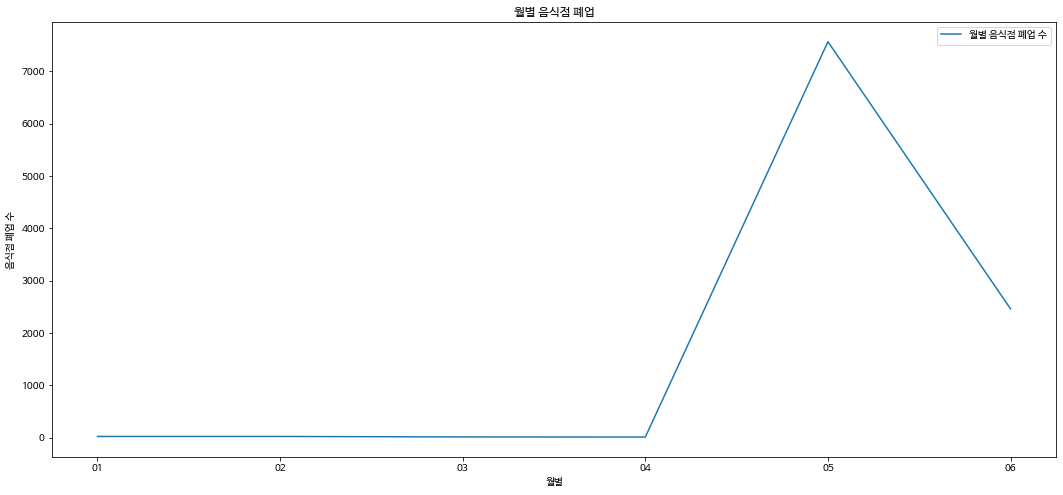

In [ ]:
# 월별 음식점 폐업 수
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.lineplot(closed_food.index, closed_food, label = '월별 음식점 폐업 수')
ax.set(xlabel='월별', ylabel='음식점 폐업 수')
plt.title('월별 음식점 폐업')
plt.show()

폐업수가 5월달에 급격하게 증가한것으로 확인된다.

#### 4. 배달 비율 많은 지역 나눔 TOP6(뉴스기사 기준으로) 60% 이상
배달 창*폐업 예측을 위해 배달 비율이 많은 지역을 찾아 분석하고자 한다.
TOP6를 정하게된 기준은 글로벌 데이터 분석업체 던험비가 코로나19 영향을 받은 20개국의 소비자 8천명을 대상으로 벌인 설문조사에 따르면 배달음식 서비스를 이용하는 한국 소비자는 60%로 확인되어 그 수치를 기반으로 Top6를 선정하게 되었다.
단순히 배달이용율로만 보는것이 아니라 지역의 인구당 배달이용을 비교하여 인구대비 이용이 많은 곳을 선정하고자 한다.


In [ ]:
# 지역별 배달량
dlvr_count = kt_dataset['dlvr_call']['DLVR_STORE_SIGNGU_NM'].value_counts()

In [ ]:
# 인구 (구글 검색, 2020년 기준, 총 배달량 1만건 이상 기준, (1만 단위))

population = [46.17, #영등포
 81.84, #부천시
 29.86, #광명
 40.44, #구로구
 47.24, #덕양구
 23.17, #금천구
 35.18, #상록구
 37.95, #영등포구
 71.3,  #남양주
 50.1,  #시흥시
 53.7, #평택시
 32.5, #도봉구
 37.98, #은평구
 9.4, #동두천
 14.73, #포천시
 30.19, #동안구
 85.5,  #화성시
 30.25, #일산서구
 39.12, #동작구
 38.2,  #광주시
 29.97, #일산동구
 9.51,  #관악구
 23.04, #양주시
 25.57, #처인구
 52.3, # 노원구
 45.42, #양천구
 46.56 # 파주시
]

In [ ]:
dlvr_count = dlvr_count[:'파주시'].reset_index()
dlvr_count['popl'] = population 
dlvr_count['popl'] = dlvr_count['popl'].apply(lambda x : x*10000) # 1단위로 변환
dlvr_count['비율'] = dlvr_count['DLVR_STORE_SIGNGU_NM'] / dlvr_count['popl']
dlvr_count['비율'] = dlvr_count['비율'].apply(lambda x : x*100) # 지수에서 퍼센트로 변환
dlvr_count.sort_values(by = '비율', ascending = False)

,index,DLVR_STORE_SIGNGU_NM,popl,비율
0,의정부시,1099517,461700.0,238.145332
2,광명시,368327,298600.0,123.351306
3,구로구,357818,404400.0,88.481207
13,동두천시,80220,94000.0,85.340426
5,금천구,167738,231700.0,72.394476
1,부천시,548336,818400.0,67.000978
4,고양시 덕양구,272814,472400.0,57.750635
14,포천시,74512,147300.0,50.585200
6,안산시 상록구,155620,351800.0,44.235361
7,영등포구,155350,379500.0,40.935441


In [ ]:
# http://m.ksmnews.co.kr/view.php?idx=325123 기사에 의하면 국내 인구 60%이상이 배달 서비스를 사용

region_nm = list(dlvr_count[dlvr_count['비율'] > 60]['index'])

In [ ]:
region_nm

['의정부시', '부천시', '광명시', '구로구', '금천구', '동두천시']

배달이용비율이 가장 많은 지역을 확인해본 결과 창*폐업 예측에 사용될 데이터의 지역은 

의정부시, 부천시, 광명시, 구로구, 금천구, 동두천시 이다.

# [배달 비율이 많은 지역(TOP6)에서 어느 이유로 배달 이용 창폐업이 이루어 질까]


#### 1. 기간별/음식별 매출액 시각화

우선 가게의 창*폐업의 주 요인이라고 할 수 있는 매출액을 분석하고자 한다. 
이를 분석하기위해 음식별로 매출액이 어떠한 특성을 가지고있는지 분석하고자 한다.



In [ ]:
top6 = kt_dataset['dlvr_call'][kt_dataset['dlvr_call']['DLVR_DSTN_SIGNGU_NM'].isin(['부천시', '광명시', '구로구', '금천구', '의정부시', '동두천시'])]
top6

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,months
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,12
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N,12
5,3486940,2019-12-01,C000237,1,C000237,S0021813,아시안/양식,4121010100,경기도,광명시,광명동,\N,4121055000,412103187064,4121010200,경기도,광명시,철산동,\N,4121060000,412103187028,D0003991,3300,200,19000,2,NaN,2019-12-01 19:08:19,2019-12-01 19:37:13,2019-12-01 19:58:04,2019-12-01 19:58:06,\N,12
6,3486941,2019-12-01,C000250,1,C000250,S0019514,족발/보쌈,4119011300,경기도,부천시,괴안동,\N,4119079500,411903185010,4119010700,경기도,부천시,역곡동,\N,4119060600,411904352372,D0004334,3000,200,32000,1,승인:KB국민카드,2019-12-01 21:17:12,2019-12-01 21:17:50,2019-12-01 21:23:22,2019-12-01 21:36:15,\N,12
7,3486942,2019-12-01,C000240,1,C000238,S0020310,카페/디저트,4119011400,경기도,부천시,송내동,\N,4119074600,411904355059,4119010800,경기도,부천시,중동,\N,4119074200,411903184007,D0004845,4500,200,17500,2,NaN,2019-12-01 21:18:23,2019-12-01 21:19:58,2019-12-01 21:48:09,2019-12-01 21:48:59,\N,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296260,7750539,2020-03-31,C000238,1,C000238,S0001402,치킨,4119010100,경기도,부천시,원미동,\N,4119060600,4.11903E+11,4119010100,경기도,부천시,원미동,\N,4119060300,4.11904E+11,D0004910,3000,200,30500,2,NaN,2020-03-31 23:59,2020-04-01 0:01,2020-04-01 0:19,2020-04-01 0:20,\N,03
4296263,7750543,2020-03-31,C000031,1,C000043,S0037800,치킨,4115010400,경기도,의정부시,신곡동,\N,4115056700,4.11504E+11,4115010100,경기도,의정부시,의정부동,\N,4115051000,4.11503E+11,D0010381,3500,300,0,2,NaN,2020-03-31 23:59,2020-04-01 0:00,2020-04-01 0:25,2020-04-01 0:55,\N,03
4296264,7750544,2020-03-31,C000028,1,C000043,S0037021,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,4.11503E+11,4115010100,경기도,의정부시,의정부동,\N,4115051000,4.11504E+11,D0004971,3500,300,21000,2,NaN,2020-03-31 23:57,2020-03-31 23:57,2020-04-01 0:06,2020-04-01 0:06,\N,03
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56,2020-03-31 23:56,2020-04-01 0:14,2020-04-01 0:18,\N,03


In [ ]:
# top 6 월별 배달량
dlvr_trend = top6.groupby(by='months').count()['PROCESS_DT'].reindex(['12','01','02','03','04','05'])
dlvr_trend

months
12    390749
01    403992
02    420426
03    464970
04    441526
05    465425
Name: PROCESS_DT, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


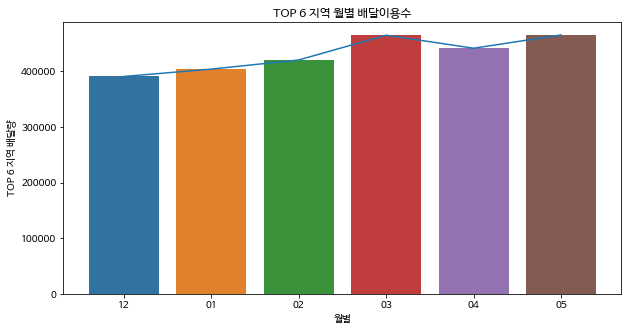

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(dlvr_trend.index, dlvr_trend)
ax1 = sns.lineplot(dlvr_trend.index, dlvr_trend)
ax.set(xlabel='월별', ylabel='TOP 6 지역 배달량')
plt.title('TOP 6 지역 월별 배달이용수')
plt.show()

In [ ]:
food_type = list(top6['DLVR_STORE_INDUTY_NM'].drop_duplicates())
food_type

['치킨',
 '아시안/양식',
 '족발/보쌈',
 '카페/디저트',
 '패스트푸드',
 '분식',
 '야식',
 '한식',
 '배달전문업체',
 '회',
 '중식',
 '돈까스/일식',
 '피자',
 '찜탕',
 '심부름',
 '도시락']

In [ ]:
# top 6 지역 기준으로 음식별 배달 매출
food_months = {}
food_monthly = {}
for i in food_type:
    food_months[i] = top6[top6['DLVR_STORE_INDUTY_NM']==i]
    food_monthly[i] = food_months[i].groupby(by='months').sum()['GOODS_AMOUNT']
    food_monthly[i] = food_monthly[i].reindex(['12','01','02','03','04','05'])

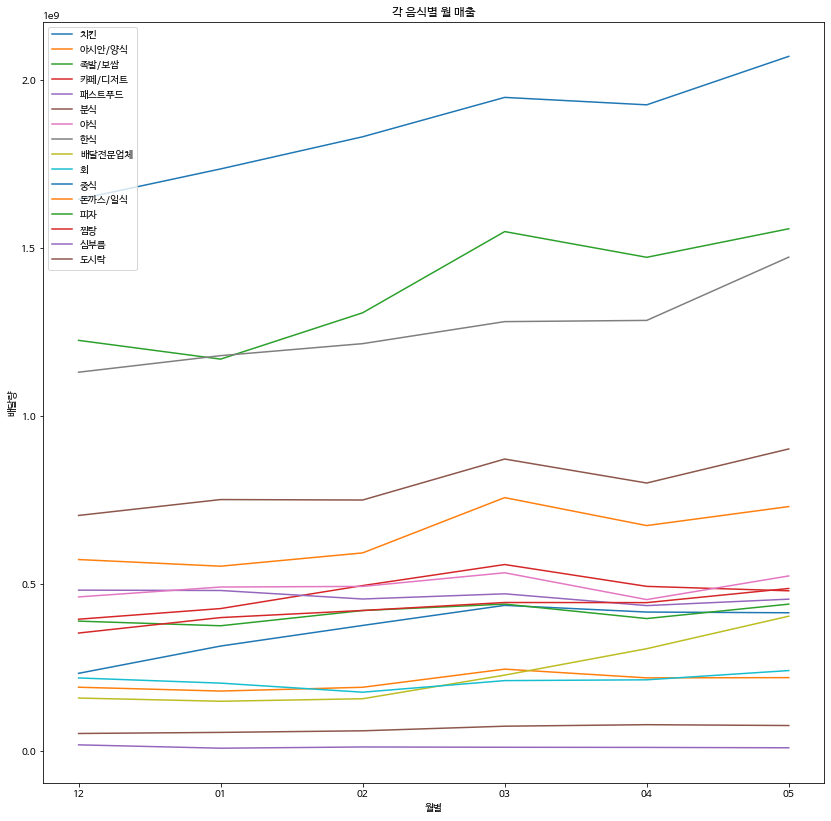

In [ ]:
plt.rcParams["figure.figsize"] = (14,14)

for i, j in enumerate(food_monthly):
    plt.plot(food_monthly[j].index, food_monthly[j], label=j)
plt.xlabel('월별')
plt.ylabel('배달량')
plt.title('각 음식별 월 매출')    
plt.legend(loc='upper left')
plt.show()

#### 3. 1인가구 시각화 그래프



In [ ]:
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL21161&conn_path=I2 통계청 데이터
# 배달량 1만건 이상 기준

household = pd.read_excel('/gdrive/Shareddrives/DACON/DACON/one_household.xlsx')

In [ ]:
household = household.sort_values('location').reset_index()[['location','ratio','household','whole household']]
household

,location,ratio,household,whole household
0,고양시,25.2,100409,398864
1,관악구,51.9,129233,248959
2,광명시,23.8,26496,111383
3,광주시,24.2,34577,143039
4,구로구,31.1,50971,164083
5,금천구,40.9,42334,103432
6,남양주시,21.1,53418,252977
7,노원구,27.8,56438,202695
8,도봉구,27.4,34884,127362
9,동두천시,31.7,12035,37936


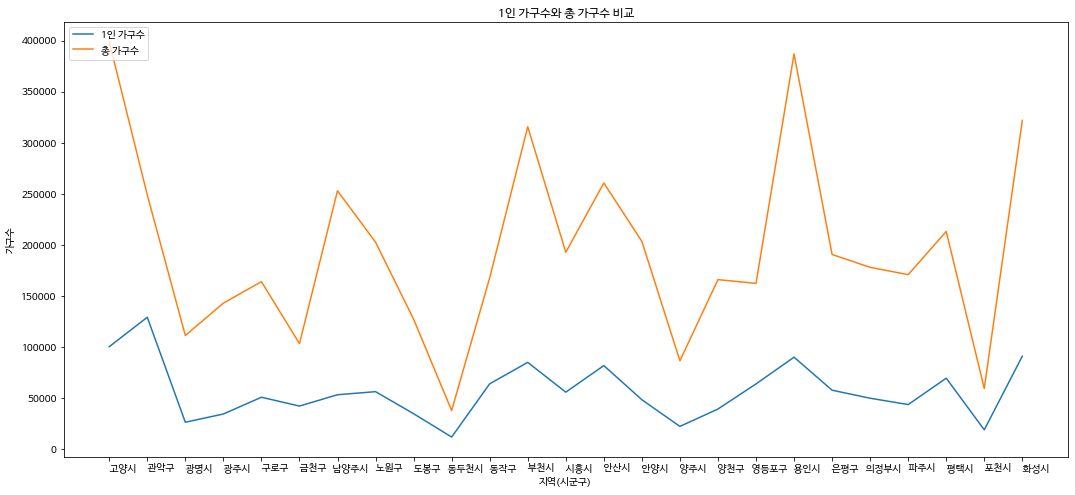

In [ ]:
plt.rcParams["figure.figsize"] = (18,8)
plt.plot(household['location'], household['household'], label = '1인 가구수')
plt.plot(household['location'], household['whole household'], label = '총 가구수')
plt.xlabel('지역(시군구)')
plt.ylabel('가구수')
plt.title('1인 가구수와 총 가구수 비교')
plt.legend(loc = 'upper left')
plt.show()

#### 4. 주문하는곳과 배달하는곳 비교 그래프


In [ ]:
dest = top6[top6['DLVR_DSTN_SIGNGU_NM'].isin(['부천시', '광명시', '구로구', '금천구','의정부시', '동두천시'])]
store =  top6[top6['DLVR_STORE_SIGNGU_NM'].isin(['부천시', '광명시', '구로구', '금천구','의정부시', '동두천시'])]

In [ ]:
dest_cnt = dest.months.value_counts().reindex(['12', '01', '02', '03', '04', '05'])
store_cnt = store.months.value_counts().reindex(['12', '01', '02', '03', '04', '05'])

In [ ]:
dest_cnt

12    390749
01    403992
02    420426
03    464970
04    441526
05    465425
Name: months, dtype: int64

In [ ]:
 store_cnt

12    387831
01    401217
02    417931
03    461492
04    437926
05    461222
Name: months, dtype: int64

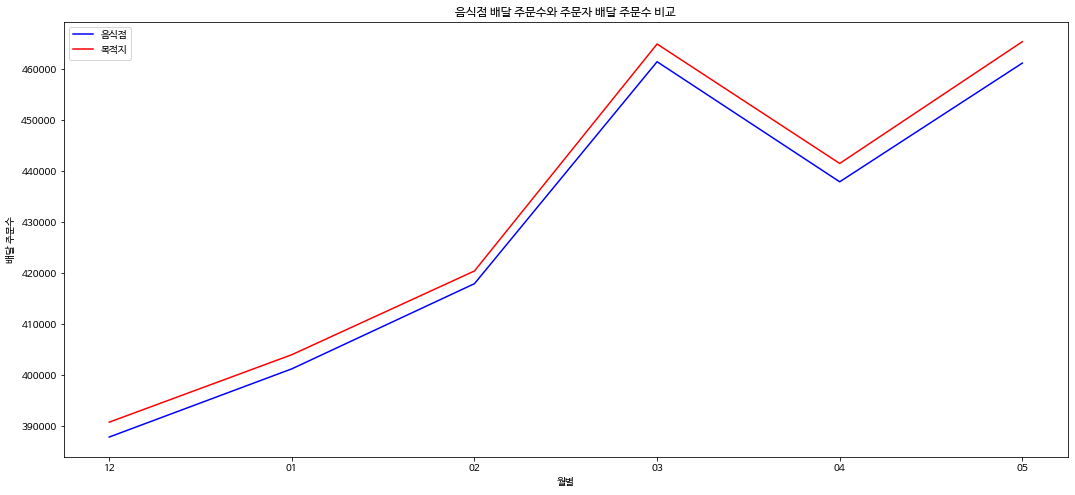

In [ ]:
plt.rcParams["figure.figsize"] = (18,8)
plt.plot(store_cnt.index, store_cnt, label = '음식점', color='b')
plt.plot(dest_cnt.index, dest_cnt, label = '목적지', color='r')
plt.xlabel('월별')
plt.ylabel('배달 주문수')
plt.legend(loc = 'upper left')
plt.title('음식점 배달 주문수와 주문자 배달 주문수 비교')
plt.show()

위에 그래프와 같이 주문자의 배달 시킨 음식점과의 거리가 먼것을 확인할 수가 있다.

#### 5. 창폐업이 이루어진 지도 시각화 - 지역별 폐업 가게 시각화

In [ ]:
import pandas as pd
from geopy.distance import great_circle
import folium
import os

In [ ]:
start_close2 = pd.read_csv('/gdrive/Shareddrives/DACON/DACON/KT_빅데이터플랫폼_데이터셋/StartupOrClosing_Region_ver2.csv')

In [ ]:
region_food_keywords = ['감자탕','게요리','곰탕','곱창.양구이','국수','굴요리','김밥','낙지요리','닭갈비','닭강정','닭발','닭요리','닭집','도너츠','돈가스','돼지갈비','돼지국밥','두부요리','떡볶이','라면','막국수','만두','매운탕','메밀요리','밀면','백숙','베트남음식','보리밥','복어요리','부대찌개','분식','불닭','브런치카페','빵.과자','삼겹살','삼계탕','샤브샤브','설렁탕','소머리국밥','순대.순대국','순대국밥','순두부','스테이크','스파게티','쌈밥','아귀요리','아이스크림','야식','양고기','양식','오리고기','오리요리','오징어요리','우동','육류.고기요리','육류','음식배달대행','음식점-고로케전문','음식점-닭요리전문','음식점-마라탕','음식점-생태/동태/명태요리전문','음식점-이자카야','이탈리아요리','일식','일식튀김.꼬치','장어','전복요리','제과.제빵','제과점','조개구이','족발.보쌈','중국음식','쭈꾸미요리','찌개.전골','찜닭','참치요리','철판구이','초밥.롤','추어탕','출장요리','치킨','카페','카페-디저트','칼국수','코다리전문','콩요리','태국음식','토스트','편의점','포장마차','퓨전음식','프랜차이즈','한식','한우고기','한정식','핫도그','해장국','햄버거','호두과자','홍어','횟집','흑돼지']

In [ ]:
food_keywords= ['게요리','국수','돈가스','돼지국밥','떡.한과','스파게티','피자','카페','김밥','떡볶이','카페-디저트','한식','제과점','편의점','치킨','아이스크림','야식','육류.고기요리','냉면','일식튀김.꼬치','족발.보쌈','삼계탕','관광음식점','중국음식','감자탕','분식','샤브샤브','스테이크','출장요리','장어','양식','닭발','호프','도시락','일식','돼지갈비','샌드위치','삼겹살','순대국밥','육류','곱창.양구이','비빔밥','한우고기','한정식','닭집','도너츠','막국수','만두','말고기','밀면','불닭','사철.영양탕','순대.순대국','아귀요리','오리고기','음식배달대행','음식점-생태/동태/명태요리전문','음식점-이자카야','쭈꾸미요리','패스트푸드(종합)','포장마차','핫도그','횟집','흑돼지','낙지요리','닭요리','대구탕','두부요리','떡집','라면','막창','버섯요리','부대찌개','빵.과자','설렁탕','시락국밥','양고기','찜닭','토스트','한식배달','해물.생선요리','꽈배기전문','복어요리','소머리국밥','전복요리','햄버거','갈비탕','곰탕','굴요리','꿩고기','다슬기요리','닭갈비','닭강정','떡갈비','머릿고기','멕시코요리','보리밥','붕어찜','브런치카페','샐러드전문점','순두부','쌈밥','어죽','어탕','오리요리','오징어요리','우동','육개장전문','음식점-고로케전문','음식점-닭요리전문','음식점-마라탕','인도음식','제과.제빵','주먹밥','찌개.전골','참치요리','초밥.롤','추어탕','카레','코다리전문','콩국수','콩나물국밥','콩요리','태국음식','퓨전음식','호두과자','홍어','감자튀김','멧돼지고기','양식업(기타)','화덕피자전문','보리빵','바닷가재요리','소고기국밥','프랑스요리','호떡','샤브샤브부페','문어요리','연어전문']

In [ ]:
region_food_keywords.extend(food_keywords)

In [ ]:
food_keys = list(set(region_food_keywords))

In [ ]:
start_close2 = start_close2[start_close2['INDUTY_NM'].isin(food_keys)]

In [ ]:
start_close2['SIGUNGU_NM'] = start_close2['SIGUNGU_NM'].str.split()
start_close2['SIGUNGU_NM'] = start_close2['SIGUNGU_NM'].apply(lambda x : x[0])
top6 = start_close2[start_close2['SIGUNGU_NM'].isin(['의정부시','동두천시', '광명시', '부천시', '금천구', '구로구'])]

In [ ]:
close_top6 = top6[top6['DIVISION']==0]

In [ ]:
open_top6 = top6[top6['DIVISION']==1]

In [ ]:
close_top6.drop(labels = ['INDEX'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
close_top6.rename(columns = {'LA_DCMLPOINT_VALUE' : 'latitude','LO_DCMLPOINT_VALUE' : 'longitude'},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
close_top6['latitude'] = close_top6['latitude'].apply(lambda x: str(x)[:6])
close_top6['longitude'] = close_top6['longitude'].apply(lambda x: str(x)[:6])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
close_top6['latitude'] = close_top6['latitude'].astype(float)
close_top6['longitude'] = close_top6['longitude'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
close_top6.reset_index(inplace=True)

In [ ]:
for i in range(len(close_top6)):
    if close_top6['SIGUNGU_NM'][i] == '의정부시':
        close_top6['latitude'][i] = float(37.74) 
        close_top6['longitude'][i] = float(127.06)
    
    if close_top6['SIGUNGU_NM'][i] == '동두천시':
        close_top6['latitude'][i] = float(37.90) 
        close_top6['longitude'][i] = float(127.05)
    
    if close_top6['SIGUNGU_NM'][i] == '광명시':
        close_top6['latitude'][i] = float(37.44) 
        close_top6['longitude'][i] = float(126.86)
            
    if close_top6['SIGUNGU_NM'][i] == '부천시':
        close_top6['latitude'][i] = float(37.50) 
        close_top6['longitude'][i] = float(126.78)
    
    if close_top6['SIGUNGU_NM'][i] == '구로구':
        close_top6['latitude'][i] = float(37.49) 
        close_top6['longitude'][i] = float(126.86)

    if close_top6['SIGUNGU_NM'][i] == '금천구':
        close_top6['latitude'][i] = float(37.44) 
        close_top6['longitude'][i] = float(126.93)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.

In [ ]:
top6['SIGUNGU_NM'].value_counts()

부천시     78
의정부시    43
광명시     30
금천구     28
구로구     24
동두천시    14
Name: SIGUNGU_NM, dtype: int64

In [ ]:
lat = close_top6['latitude'].mean()
long = close_top6['longitude'].mean()

lat = 37.66881447715899
long = 127.02173448756433

map = folium.Map([lat,long],zoom_start=11)

In [ ]:
list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map)
for a in close_top6.index:
    b = close_top6['SIGUNGU_NM'][a]
    folium.Marker(location = [close_top6.loc[a,"latitude"],close_top6.loc[a,"longitude"]],
                
                    popup=close_top6.loc[a,"SIGUNGU_NM"]).add_to(marker_cluster)
    list1.append(close_top6.loc[a,"latitude"])
    list2.append(close_top6.loc[a,"longitude"])

map

#### 5-1. Top6 지역 1인가구 및 폐업 지도 시각화 
한눈에 보기위해서 지도로 시각화 하였다.

In [ ]:
import pandas as pd
from geopy.distance import great_circle
import folium
import os
import re

In [ ]:
start_close2 = pd.read_csv('/gdrive/Shareddrives/DACON/DACON/KT_빅데이터플랫폼_데이터셋/StartupOrClosing_Region_ver2.csv')

In [ ]:
region_food_keywords = ['감자탕','게요리','곰탕','곱창.양구이','국수','굴요리','김밥','낙지요리','닭갈비','닭강정','닭발','닭요리','닭집','도너츠','돈가스','돼지갈비','돼지국밥','두부요리','떡볶이','라면','막국수','만두','매운탕','메밀요리','밀면','백숙','베트남음식','보리밥','복어요리','부대찌개','분식','불닭','브런치카페','빵.과자','삼겹살','삼계탕','샤브샤브','설렁탕','소머리국밥','순대.순대국','순대국밥','순두부','스테이크','스파게티','쌈밥','아귀요리','아이스크림','야식','양고기','양식','오리고기','오리요리','오징어요리','우동','육류.고기요리','육류','음식배달대행','음식점-고로케전문','음식점-닭요리전문','음식점-마라탕','음식점-생태/동태/명태요리전문','음식점-이자카야','이탈리아요리','일식','일식튀김.꼬치','장어','전복요리','제과.제빵','제과점','조개구이','족발.보쌈','중국음식','쭈꾸미요리','찌개.전골','찜닭','참치요리','철판구이','초밥.롤','추어탕','출장요리','치킨','카페','카페-디저트','칼국수','코다리전문','콩요리','태국음식','토스트','편의점','포장마차','퓨전음식','프랜차이즈','한식','한우고기','한정식','핫도그','해장국','햄버거','호두과자','홍어','횟집','흑돼지']

In [ ]:
food_keywords= ['게요리','국수','돈가스','돼지국밥','떡.한과','스파게티','피자','카페','김밥','떡볶이','카페-디저트','한식','제과점','편의점','치킨','아이스크림','야식','육류.고기요리','냉면','일식튀김.꼬치','족발.보쌈','삼계탕','관광음식점','중국음식','감자탕','분식','샤브샤브','스테이크','출장요리','장어','양식','닭발','호프','도시락','일식','돼지갈비','샌드위치','삼겹살','순대국밥','육류','곱창.양구이','비빔밥','한우고기','한정식','닭집','도너츠','막국수','만두','말고기','밀면','불닭','사철.영양탕','순대.순대국','아귀요리','오리고기','음식배달대행','음식점-생태/동태/명태요리전문','음식점-이자카야','쭈꾸미요리','패스트푸드(종합)','포장마차','핫도그','횟집','흑돼지','낙지요리','닭요리','대구탕','두부요리','떡집','라면','막창','버섯요리','부대찌개','빵.과자','설렁탕','시락국밥','양고기','찜닭','토스트','한식배달','해물.생선요리','꽈배기전문','복어요리','소머리국밥','전복요리','햄버거','갈비탕','곰탕','굴요리','꿩고기','다슬기요리','닭갈비','닭강정','떡갈비','머릿고기','멕시코요리','보리밥','붕어찜','브런치카페','샐러드전문점','순두부','쌈밥','어죽','어탕','오리요리','오징어요리','우동','육개장전문','음식점-고로케전문','음식점-닭요리전문','음식점-마라탕','인도음식','제과.제빵','주먹밥','찌개.전골','참치요리','초밥.롤','추어탕','카레','코다리전문','콩국수','콩나물국밥','콩요리','태국음식','퓨전음식','호두과자','홍어','감자튀김','멧돼지고기','양식업(기타)','화덕피자전문','보리빵','바닷가재요리','소고기국밥','프랑스요리','호떡','샤브샤브부페','문어요리','연어전문']

In [ ]:
region_food_keywords.extend(food_keywords)

In [ ]:
food_keys = list(set(region_food_keywords))

In [ ]:
start_close2 = start_close2[start_close2['INDUTY_NM'].isin(food_keys)]

In [ ]:
start_close2['SIGUNGU_NM'] = start_close2['SIGUNGU_NM'].str.split()
start_close2['SIGUNGU_NM'] = start_close2['SIGUNGU_NM'].apply(lambda x : x[0])
top6 = start_close2[start_close2['SIGUNGU_NM'].isin(['의정부시','동두천시', '광명시', '부천시', '금천구', '구로구'])]

In [ ]:
close_top6 = top6[top6['DIVISION']==0]

In [ ]:
open_top6 = top6[top6['DIVISION']==1]

In [ ]:
close_top6.drop(labels = ['INDEX'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
close_top6.rename(columns = {'LA_DCMLPOINT_VALUE' : 'latitude','LO_DCMLPOINT_VALUE' : 'longitude'},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
close_top6['latitude'] = close_top6['latitude'].apply(lambda x: str(x)[:6])
close_top6['longitude'] = close_top6['longitude'].apply(lambda x: str(x)[:6])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
close_top6['latitude'] = close_top6['latitude'].astype(float)
close_top6['longitude'] = close_top6['longitude'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
close_top6.reset_index(inplace=True)

In [ ]:
for i in range(len(close_top6)):
    if close_top6['SIGUNGU_NM'][i] == '의정부시':
        close_top6['latitude'][i] = float(37.74) 
        close_top6['longitude'][i] = float(127.06)
    
    if close_top6['SIGUNGU_NM'][i] == '동두천시':
        close_top6['latitude'][i] = float(37.90) 
        close_top6['longitude'][i] = float(127.05)
    
    if close_top6['SIGUNGU_NM'][i] == '광명시':
        close_top6['latitude'][i] = float(37.44) 
        close_top6['longitude'][i] = float(126.86)
            
    if close_top6['SIGUNGU_NM'][i] == '부천시':
        close_top6['latitude'][i] = float(37.50) 
        close_top6['longitude'][i] = float(126.78)
    
    if close_top6['SIGUNGU_NM'][i] == '구로구':
        close_top6['latitude'][i] = float(37.49) 
        close_top6['longitude'][i] = float(126.86)

    if close_top6['SIGUNGU_NM'][i] == '금천구':
        close_top6['latitude'][i] = float(37.44) 
        close_top6['longitude'][i] = float(126.93)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.

In [ ]:
top6['SIGUNGU_NM'].value_counts()

부천시     78
의정부시    43
광명시     30
금천구     28
구로구     24
동두천시    14
Name: SIGUNGU_NM, dtype: int64

In [ ]:
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL21161&conn_path=I2 통계청 데이터
# 배달량 1만건 이상 기준

household = pd.read_excel('/gdrive/Shareddrives/DACON/DACON/one_household.xlsx')

In [ ]:
household = household.sort_values('location').reset_index()[['location','household']]
household

,location,household
0,고양시,100409
1,관악구,129233
2,광명시,26496
3,광주시,34577
4,구로구,50971
5,금천구,42334
6,남양주시,53418
7,노원구,56438
8,도봉구,34884
9,동두천시,12035


In [ ]:
def clean_text(sent):
    sent_clean = re.sub("[^가-힣]", "", sent)
    return sent_clean

In [ ]:
household['location'] = household['location'].apply(lambda x: clean_text(x))

In [ ]:
house_hold = household[household['location'].isin(['의정부시','동두천시', '광명시', '부천시', '금천구', '구로구'])]

In [ ]:
house_hold

,location,household
2,광명시,26496
4,구로구,50971
5,금천구,42334
9,동두천시,12035
11,부천시,85105
20,의정부시,50008


In [ ]:
house_hold['latitude'] = ['37.445', '37.495', '37.445', '37.905', '37.505', '37.745' ]
house_hold['longitude'] = ['126.87', '126.87', '126.94','127.06',' 126.79', '127.07' ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
house_hold

,location,household,latitude,longitude
2,광명시,26496,37.445,126.87
4,구로구,50971,37.495,126.87
5,금천구,42334,37.445,126.94
9,동두천시,12035,37.905,127.06
11,부천시,85105,37.505,126.79
20,의정부시,50008,37.745,127.07


In [ ]:
house_hold.reset_index(drop=True, inplace=True)

In [ ]:
lat = close_top6['latitude'].mean()
long = close_top6['longitude'].mean()

lat = 37.66881447715899
long = 127.02173448756433

map = folium.Map([lat,long],zoom_start=11)

In [ ]:
list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map)


for a in close_top6.index:
    b = close_top6['SIGUNGU_NM'][a]
    folium.Marker(location = [close_top6.loc[a,"latitude"],close_top6.loc[a,"longitude"]],popup=close_top6.loc[a,"SIGUNGU_NM"]).add_to(marker_cluster)
    list1.append(close_top6.loc[a,"latitude"])
    list2.append(close_top6.loc[a,"longitude"])

In [ ]:
for i, j, k in zip(house_hold['household'], house_hold['latitude'].astype(float), house_hold['longitude'].astype(float)):
  div = folium.DivIcon(html=(
      '<svg height="100" width="100">'
      '<circle cx="25" cy="25" r="20" stroke="red" stroke-width="3" fill="white" />'
      '<text x="8" y="28.5" fill="black">'+ str(i) +'</text>'
      '</svg>'
  ))
  folium.Marker((j	, k), icon=div).add_to(map)

In [ ]:
map

In [ ]:
map.save(outfile= "test.html1")

#### 6. 배달이용건수와 코로나 감염수 시각화


In [ ]:
# 배달량 vs 지역
# 코로나 감염수 vs 지역

top6 = kt_dataset['dlvr_call'][kt_dataset['dlvr_call']['DLVR_DSTN_SIGNGU_NM'].isin(['부천시', '광명시', '구로구', '금천구', '의정부시', '동두천시'])]
dlv_top6 = top6['DLVR_DSTN_SIGNGU_NM'].value_counts()
#dlv_top6 = dlv_top6.reset_index()

In [ ]:
top6_keys = [
             'Uijeongbu-si',
             'Bucheon-si',
             'Guro-gu',
             'Gwangmyeong-si',
             'Geumcheon-gu',
             'Dongducheon-si'
             ]

In [ ]:
cov_top6 = covid_dataset['PatientInfo'][covid_dataset['PatientInfo']['city'].isin(top6_keys)]
covid_top6 = cov_top6.groupby('city').count()['patient_id']
covid_top6 = covid_top6.reindex(top6_keys)
#covid_top6 = covid_top6.reset_index()

In [ ]:
covid_top6

city
Uijeongbu-si       47
Bucheon-si        162
Guro-gu            85
Gwangmyeong-si     28
Geumcheon-gu       32
Dongducheon-si      5
Name: patient_id, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
dlv_top6 = dlv_top6.astype(float)
cov_top6 = covid_top6.astype(float)

In [ ]:
scaler.fit(dlv_top6.values.reshape(-1, 1))
scaled_dlv = scaler.transform(dlv_top6.values.reshape(-1, 1))
dlvs = scaled_dlv.reshape(1,-1)[0]

In [ ]:
scaler.fit(covid_top6.values.reshape(-1, 1))
scaled_cov = scaler.transform(covid_top6.values.reshape(-1, 1))
scaled_cov
covs = scaled_cov.reshape(1,-1)[0]

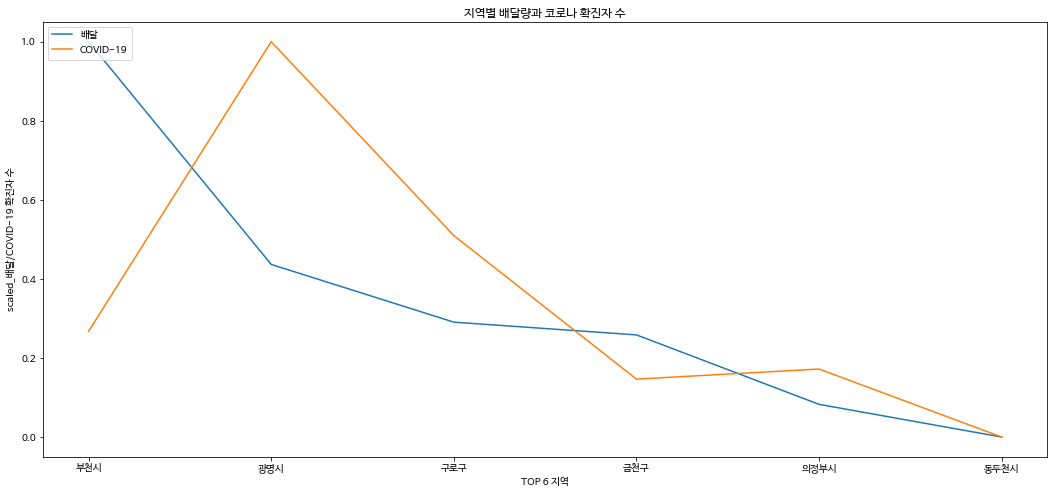

In [ ]:
x = ['부천시', '광명시', '구로구', '금천구', '의정부시', '동두천시']
plt.plot(x, dlvs, label='배달')
plt.plot(x, covs, label='COVID-19')
plt.xlabel('TOP 6 지역')
plt.ylabel('scaled_배달/COVID-19 확진자 수')
plt.legend(loc = 'upper left')
plt.title('지역별 배달량과 코로나 확진자 수')
plt.show()

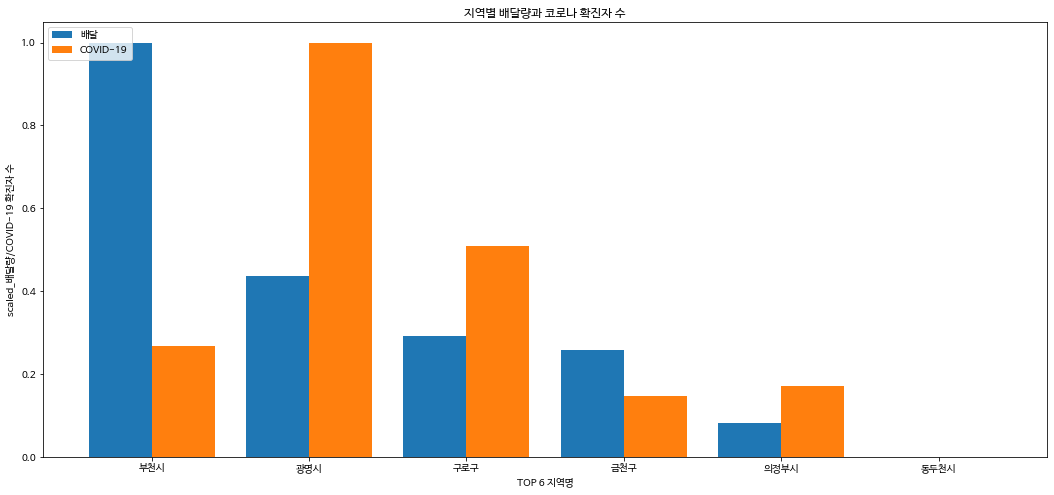

In [ ]:
x = ['부천시', '광명시', '구로구', '금천구', '의정부시', '동두천시']
X_axis = np.arange(len(x))
plt.bar(X_axis-0.2, dlvs, 0.4, label='배달')
plt.bar(X_axis+0.2, covs, 0.4, label='COVID-19')
plt.xlabel('TOP 6 지역명')
plt.ylabel('scaled_배달량/COVID-19 확진자 수')
plt.legend(loc = 'upper left')
plt.title('지역별 배달량과 코로나 확진자 수')
plt.xticks(X_axis, x)
plt.show()

# Suggestion

→ 첫번째 분석을 통해 COVID-19 이후 배달 이용이 코로나 확진자수에 따라 변화함을 확인할 수 있다.


→ 인구대비 배달이용률로 가장 많인 배달이용비율을 가지고 있는 도시 Top6는의정부시, 부천시, 광명시, 구로구, 금천구, 동두천시 이다.

→ TOP6로 분석해 보았을때 COVID-19가 시작된 기간의 매출이 높은 음식 업종 TOP3 는 치킨, 족발&보쌈, 한식이다.

→ DATA기간 동안 사람들은 음식점이 목적지 주변이아닌 외부지역에서 배달을 시켰을 것으로 확인 된다.

→ 지도를 통해 폐업 수를 확인할 수있다.

##★이러한 요인들을 확인함으로써 창업하기전 창폐업 요인에 대하여 분석하여 가게 위치 선정에 도움을 줄 수 있으며, 배달이용건수 요인과 함께 분석하였기 때문에 배달 집중현상을 어느정도 완화하는데에 도움이 될 수 있다.

## 참고문헌


*   https://news.joins.com/article/23816720
*   https://news.mt.co.kr/mtview.php?no=2021030214421871678 
*   https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL21161&conn_path=I2 
*   https://www.donga.com/news/Society/article/all/20201121/104077288/1
*   https://m.moneys.mt.co.kr/article.html?no=2018061213008053420&ref=#_enliple 
*   http://m.ksmnews.co.kr/view.php?idx=325123



 



